# **PRÀCTICA ÀLGEBRA: Anàlisi de llibres**
- Biel Fernandez Herencia

- Izan Perez Sanchez

- Edgar Saez Lopez

Com hi havia problemes amb la dataset de películes, hem decidit agafar-ne una de molt similar que en comptes de películes té llibres

In [102]:
!pip install kagglehub numpy pandas matplotlib plotly

Defaulting to user installation because normal site-packages is not writeable


Realitzem la instal·lació de les llibreries, per tal que el programa s’executi correctament. La majoria d’aquestes no venen instal·lades de fàbrica, així, només cal executar aquest quadre per descarregar-les.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zygmunt/goodbooks-10k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\abano\.cache\kagglehub\datasets\zygmunt\goodbooks-10k\versions\5


Aquí importem tot el dataset del kagglehub. Les dades es guarden en una ruta local que emmagatzemem a la variable "path" per poder accedir-hi posteriorment.

Per poder treballar millor i no preocupar-nos pels possibles problemes que podía donar l'altre dataset, hem agafat un similar al oferit però de llibres en comptes de pel·lícules.

In [2]:
import os
os.listdir(path)

['books.csv',
 'book_tags.csv',
 'ratings.csv',
 'sample_book.xml',
 'tags.csv',
 'to_read.csv']

Llistem els fitxers descarregats per després crear una estructura de dades on emmagatzarem les dades importants.

In [3]:
import pandas as pd

df = pd.read_csv(path+"/ratings.csv")
df

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [4]:
pd.unique(df['book_id']).shape

(10000,)

In [5]:
df = df.iloc[:, :3]

df = pd.pivot_table(df, values="rating", index="user_id",
                       columns="book_id")

df

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.iloc[:700, :1000]
df

book_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Importem pandas, que es la llibreria per gestionar els datasets i guardem la taula dels “ratings” a una variable.
Imprimim les primeres parts de la taula per verificar que tot ha funcionat bé.

Ara redefinim la variable anterior, primer agafem només una part de tot el dataset, ja que eren masses dades per posarles totes als grafics que es verurán més a continuació, per tant afafem els 700 primers usuaris i els 1000 primer llibres.

A continuació utilitzem el “pivot table” del pandas per crear la matriu que té com a columnes els llibres i com a files els usuaris, els valors de les posicions són les valoracions donades pels usuaris als llibres.

Imprimim la matriu resultant per veure que tot ha quedat bé.

Les dimensions de la matriu son 700 x 1000 ja que són les dimensions del dataset que hem agafat abans. Cada fila representa un usuari, i les columnes representen els diferents llibres que han rebut valoracions. 

In [7]:
df = df.fillna(0)
df

book_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Per poder treballar amb la matriu canviem els valors que no estan definits per zeros amb la comanda fillna(0).

In [8]:
import numpy as np
from numpy.linalg import svd

U, sigma, Vt = svd(df, full_matrices=False)

# construim la matriu diagonal perque a la funció svd el valor sigma es un array amb els valors singulars
Sigma = np.diag(sigma)


Importem la llibreria numpy per realitzar la descomposició en valors singulars de la matriu (SVD). Fet això, obtenim les següents estructures producte de la descomposició:
- U: matriu 700x700 que relaciona els usuaris amb els temes
- sigma: vector de valors singulars 
- Vt: matriu 700x1000 que relaciona els llibres amb els temes

Posteriorment, construim Sigma, que és la matriu diagonal formada pels valor singulars del vector sigma.

Aquestes matrius de la descomposició son necessaries per després realitzar la reducció de dimensionalitat.

In [9]:
# vector valors singulars
sigma

array([5.01376168e+01, 3.74733935e+01, 3.42651280e+01, 3.32255278e+01,
       3.00256358e+01, 2.69183961e+01, 2.46813771e+01, 2.37584079e+01,
       2.23446686e+01, 2.00119624e+01, 1.79655313e+01, 1.61739540e+01,
       1.46327932e+01, 1.39858778e+01, 1.38486191e+01, 1.34944503e+01,
       1.19514830e+01, 1.03937706e+01, 1.01826235e+01, 9.87806423e+00,
       9.51762457e+00, 9.37926572e+00, 8.84597776e+00, 8.59753569e+00,
       7.94453416e+00, 7.86272577e+00, 7.83935252e+00, 7.68803547e+00,
       7.52762218e+00, 7.30022780e+00, 7.16956452e+00, 6.87341574e+00,
       6.55118843e+00, 6.46910385e+00, 6.43068155e+00, 6.34973822e+00,
       5.74008293e+00, 5.71634212e+00, 5.58081311e+00, 5.25437769e+00,
       5.00000000e+00, 5.00000000e+00, 5.00000000e+00, 5.00000000e+00,
       4.85805971e+00, 4.00000000e+00, 4.00000000e+00, 4.00000000e+00,
       4.00000000e+00, 4.00000000e+00, 4.00000000e+00, 3.99006670e+00,
       3.94442143e+00, 3.92119349e+00, 3.89286070e+00, 3.75397424e+00,
      

Observem que els primers valors singulars són molt més grans que la resta. Això ens indica que la major part de la informació es troba en les primeres components. Aquests valors capturen l'estructura principal i els patrons més importants dels gustos dels usuaris, mentre que els valors més petits representen detalls secundaris o soroll. Per aquest motiu, podem reduir la dimensionalitat de la matriu mantenint l'essència de les dades originals.

In [58]:
print(U.shape)
print(Sigma.shape)
print(Vt.shape)

(700, 700)
(700, 700)
(700, 1000)


Aquí tenim impreses les dimensions de les tres matrius.
 - **U**: Té dimensió 700 x 700, té 700 files que representen els 700 usuaris i les 700 columnes els relacionen amb els 700 valors singulars (temes importants)
 - **Sigma**: Té dimensió 700x700, és així ja que es una matriu diagonal amb els valors singulars
 - **Vt**: Té dimensió 700x1000, te com a files els 700 valors singulars i com a columnes els 1000 llibres

A continuació veurem com podem utilitzar aquesta descomposició per fer una reducció de dimensionalitat (a dimensió 7 per exemple) i veurem com el SVD crea la millor aproximació de la matriu per rang 7:


In [20]:
k = 7

U_k = U[:, :k]
Sigma_k = np.diag(sigma[:k])
Vt_k = Vt[:k, :]

pred_centrada = np.dot(np.dot(U_k, Sigma_k), Vt_k)
pred_centrada

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22877666e-15, 5.99359744e-30, 1.05487154e-15, ...,
        0.00000000e+00, 9.02107371e-18, 0.00000000e+00],
       [5.72593789e-16, 3.30939975e-30, 3.34024070e-16, ...,
        0.00000000e+00, 3.84900145e-18, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
      shape=(700, 1000))

In [21]:
# Rang
rang_matriu_contruida = np.linalg.matrix_rank(pred_centrada)
rang_matriu_contruida

np.int64(7)

El rang de la matriu de prediccions es de 7 ja que hem reduït les dimensions a 7. 

Mitjançant aquesta matriu i nova funció explicada posteriorment hem dissenyat un sistema que ens dona les coordenades dels diferents usuaris i llibres i fa el sistema de recomanacions en base a la seva proximitat.


### Redució de dimensionalitat a 2 i mostra el gràfic 2D

El primer que farem es agafar els noms dels llibres per després utilitzarles als gràfics

In [22]:
# coger los nombres de los libros
df_book_name = pd.read_csv(path+ "/books.csv")
df_book_name = df_book_name[['id', 'original_title']]

df_book_name.head()

,id,original_title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
2,3,Twilight
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


In [23]:
df_book_name

,id,original_title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
2,3,Twilight
3,4,To Kill a Mockingbird
4,5,The Great Gatsby
...,...,...
9995,9996,Bayou Moon
9996,9997,Means of Ascent
9997,9998,The Mauritius Command
9998,9999,Cinderella Ate My Daughter: Dispatches from th...


In [24]:
df.columns

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='book_id', length=1000)

In [26]:
# Transformem el DataFrame en un diccionari per poder accedir rapidament als noms
# {movieId: titol}
dict_nombres = dict(zip(df_book_name['id'], df_book_name['original_title']))

# Creem la llista de noms seguint l'ordre de les columnes de la matriu df
# Fem servir .get() per si algun ID de la matriu no és al CSV (evita errors)
nombres_para_grafico = [dict_nombres.get(int(col), f"ID Desconocido: {col}") for col in df.columns]



In [27]:
#Reducció dimensionalitat (k equival al nombre de components que volem agafar)
def reducion_dim(k, U, sigma, Vt):
    U_k = U[:, :k]
    S_k = np.diag(sigma[:k])
    Vt_k = Vt[:k, :]

    usuarios_kd = np.dot(U_k, S_k)
    libros_kd = np.dot(Vt_k.T, S_k)

    return usuarios_kd, libros_kd


Aquesta funció que hem creat, funciona fent que donada una dimensió k i les matrius d'una SVD, ens retorna la reducció de dimensió. 

Com la utilitzarem per mostrar els usuaris i els llibres retornem els vectors amb les coordenades dels diferents usuaris i llibres al subespai de dimensió k.

In [28]:
usuarios_2d, libros_2d = reducion_dim(2, U, sigma, Vt)

Un cop ja tenim aquestes coordenades, les utilitzem per plasmar-les a un gràfic en 2 dimensions.

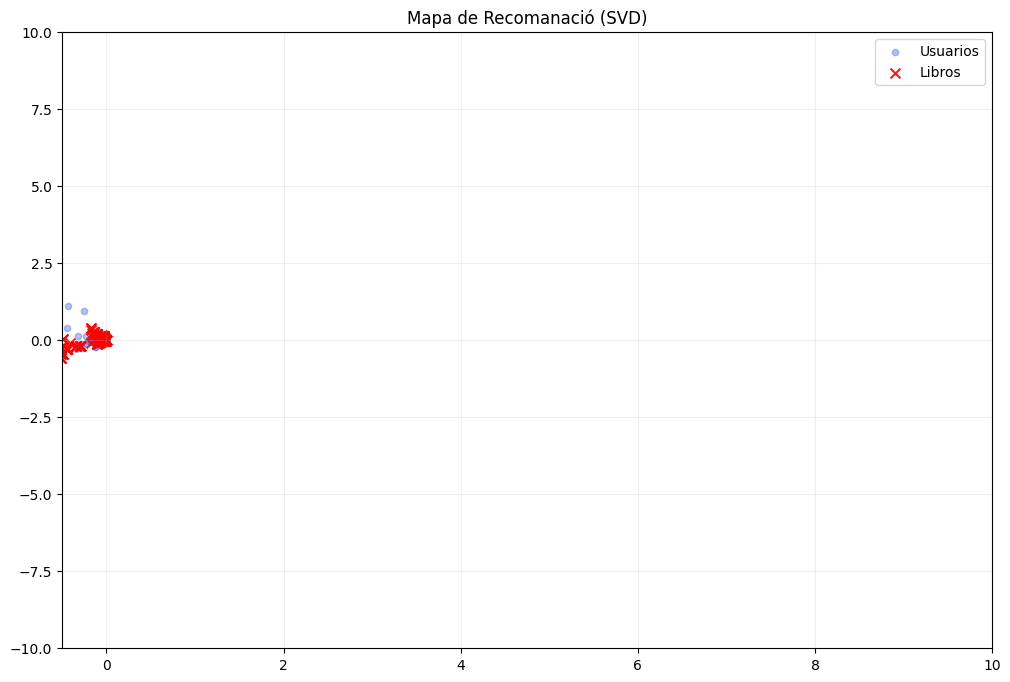

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 1. Pintem els usuaris
plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], 
            c='royalblue', alpha=0.4, label='Usuarios', s=20)

# 2. Pintem els llibres
plt.scatter(libros_2d[:, 0], libros_2d[:, 1], 
            c='red', alpha=0.9, label='Libros', marker='x', s=50)
plt.xlim(-0.5, 10) 
plt.ylim(-10, 10)

plt.title("Mapa de Recomanació (SVD)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Com es pot observar al gràfic, hi ha una alta concentració de llibres i usuaris al voltant de l'origen de coordenades (0,0) i hem agafat un interval pel gràfic massa gran.

Per solucionar-ho, al gràfic següent reajustarem els límits dels eixos (zoom) per centrar-nos en la zona on hi ha la majoria de la població i així poder apreciar millor les agrupacions.

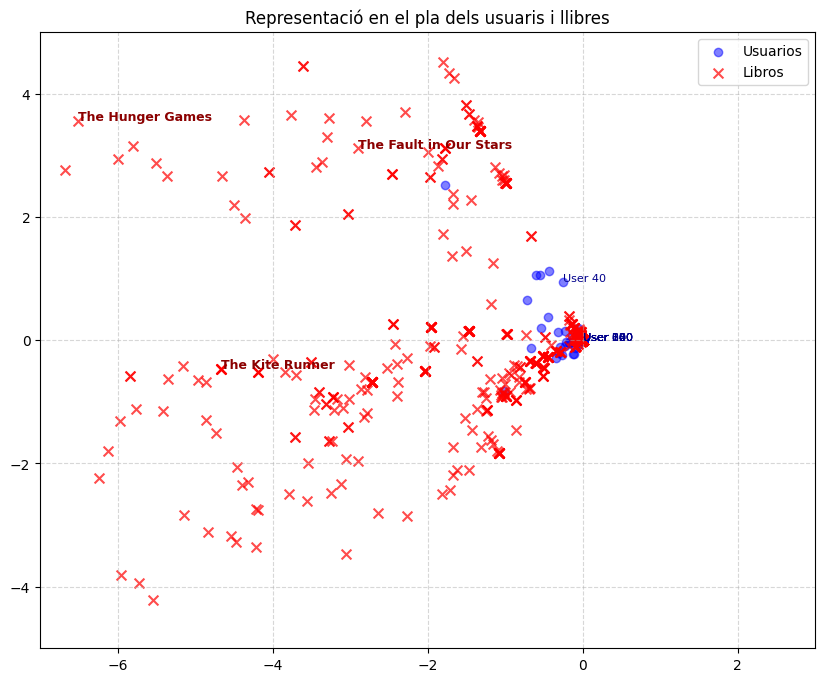

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# 1. Pintem els usuaris

plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], c='blue', label='Usuarios', alpha=0.5)

# Etiquetem els usuaris
n_usuarios_etiquetar = 200
for i in range(0, n_usuarios_etiquetar, 20):
    plt.annotate(f"User {i}", (usuarios_2d[i, 0], usuarios_2d[i, 1]), fontsize=8, color='darkblue')




# 2. Pintem els llibres
plt.scatter(libros_2d[:, 0], libros_2d[:, 1], 
            c='red', alpha=0.7, label='Libros', marker='x', s=50)


# 3. Etiquetem els llibres
n_libros_a_etiquetar = 15
for i in range(0, n_libros_a_etiquetar, 5):
    plt.annotate(nombres_para_grafico[i], (libros_2d[i, 0], libros_2d[i, 1]), fontsize=9, fontweight='bold', color='darkred')

plt.xlim(-7, 3) 
plt.ylim(-5, 5)

plt.title("Representació en el pla dels usuaris i llibres")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

#### **Anàlisi del gràfic 2D**
Després d'aplicar les millores per estandaritzar les dades (re-escalar els eixos) el gràfic ens ha quedat més llegible.

El gràfic presenta una projecció en 2D on, mitjançant la reducció de dimensionalitat (SVD), els eixos representen factors latents (com gèneres o estils) que agrupen els elements per afinitat.

Interpretació visual:

- El Centre (0,0): L'origen representa l'usuari/llibre "mitjà" o neutre. Allunyar-se del centre implica tenir gustos o característiques molt definides.

- Proximitat: La coincidència en el mateix quadrant o la proximitat geomètrica indica una alta correlació de gustos. Si un usuari (blau) cau a prop d'un llibre (vermell), el model prediu que la valorarà positivament (per sobre de la seva mitjana).

### Redució de dimensionalitat a 3 i mostra de manera interactiva 3D

**Gràfic 3d**

Per realitzar el gràfic en 3D el primer ha sigut reduir la dimensionalitat a 3 per poder representar-ho. Per fer-ho en python hem utilitzat la llibreria plotly. Hi ha principalment 3 parts: Els add_trace que bàsicament serveixen per dibuixar les dades, tenim dos: el dels usuaris i el dels llibres, cadascun extreu les dades del conjunt corresponent i les mostra amb un distintiu diferent. L'altre part és l'update layout que indica com ha de ser les mides del gràfic.


In [38]:
import plotly.express as px
import plotly.graph_objects as go

In [39]:
U, sigma, Vt = np.linalg.svd(df, full_matrices=False)

usuarios_3d, libros_3d = reducion_dim(3, U, sigma, Vt)

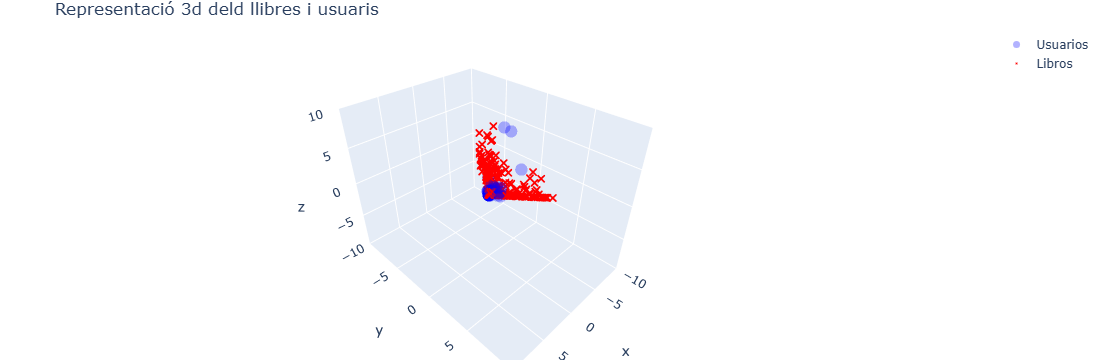

In [97]:
fig = go.Figure()

# Usuaris (Punts blaus)
fig.add_trace(go.Scatter3d(
    x=usuarios_3d[:, 0], y=usuarios_3d[:, 1], z=usuarios_3d[:, 2],
    mode='markers', 
    marker=dict(size=7, color='blue', opacity=0.3),
    name='Usuarios',
    hovertext=[f"Usuario {i}" for i in range(len(usuarios_3d))], # Info al passar el ratoli
    hoverinfo='text'
))

# Llibres (creus vermelles)
fig.add_trace(go.Scatter3d(
    x=libros_3d[:, 0], y=libros_3d[:, 1], z=libros_3d[:, 2],
    mode='markers', # Solo puntos/cruces, sin texto fijo
    marker=dict(size=2, color='red', symbol='x'),
    name='Libros',
    hovertext=nombres_para_grafico, # Titols de llibres només al hover
    hoverinfo='text'
))

# Ajustem el grafic per que el centre sigui el 0
fig.update_layout(
    title="Representació 3d deld llibres i usuaris",
    scene=dict(
        xaxis=dict(range=[-10, 10]),
        yaxis=dict(range=[-10, 10]),
        zaxis=dict(range=[-10, 10])
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

### Sistema recomendacion

Per al sistema de recomenació hem creat una funció que donada un número de usuari com a parametre mostra per pantalla quines son els 3 llibres no llegits recomanats.

Això ho fa calculant la norma euclidiana entre l'usuari i tots els llibres no llegits. I després seleciona els tres més propers que corresponen a quin es l'element més proper. Tots aquests càlculs els fem amb la SVD reduida a dimensió 2

In [41]:
def recomend_for_user(idx_usuario):
    
    # 1. Usamos La funcion para obtener las coordenadas en 2D
    usuarios_2d, libros_2d = reducion_dim(2, U, sigma, Vt)
    
    # 2. Escollim l'usuari
    coord_usuario = usuarios_2d[idx_usuario]  # El punt (x,y) de l'usuari
    puntuaciones_reales = df.iloc[idx_usuario].values
    
    # 3. Calculem distàncies
    recomendaciones = []
    
    print(f"Buscando libros cercanas al Usuario {idx_usuario}...")
    
    for i in range(len(libros_2d)):
        # Només si l'usuari no ha llegit el llibre
        if puntuaciones_reales[i] == 0:
            coord_libro = libros_2d[i] # El punto (x,y) del libro
            
            # Distancia Euclideana
            distancia = np.linalg.norm(coord_usuario - coord_libro)
            
            nombre_libro = nombres_para_grafico[i]
            recomendaciones.append((distancia, nombre_libro))
    
    # 4. Els ordenem per poder veure primer els elements més propers
    recomendaciones.sort(key=lambda x: x[0]) 
    top_3 = recomendaciones[:3]
    
    print("Los 3 libros más cercanas (no leídos) son:")
    for dist, nombre in top_3:
        print(f"  - {nombre} (Distancia: {dist:.4f})")
    print()

##### Si ens fixem en el grafic 3d l'usuari 4 y 7 estan propers, per tant ha de recomanar llibres similars tal i com es veu reflexat en les recomenacions otorgades pel sistema


In [37]:
recomend_for_user(361)


Buscando libros cercanas al Usuario 361...
Los 3 libros más cercanas (no leídos) son:
  - Snow Flower and the Secret Fan (Distancia: 0.1064)
  - Island of the Blue Dolphins (Distancia: 0.1064)
  - Northanger Abbey (Distancia: 0.1064)



In [42]:
def recommend_movie_by_movie(index_movie):
    
    usuarios_2d, libros_2d = reducion_dim(2, U, sigma, Vt)

    coord_libro = libros_2d[index_movie]  # El punto (x,y) del llibre escollir
    
    # Calculem elements propers
    recomendaciones = []
    
    for i in range(len(libros_2d)):
        if i != index_movie: #Mirem si no es el llibre que hem llegit
            coord_libro_recomendacion = libros_2d[i] # Mirem les coordenades del llibre
            
            # Distancia Euclideaana
            distancia = np.linalg.norm(coord_libro - coord_libro_recomendacion)
            
            nombre_libro = nombres_para_grafico[i]
            recomendaciones.append((distancia, nombre_libro))
    
    # ELs tornem a ordenar
    recomendaciones.sort(key=lambda x: x[0]) 
    top_3 = recomendaciones[:3]
    
    print(f"Los 3 libros recomendadas si has visto {nombres_para_grafico[index_movie]}:")
    for dist, nombre in top_3:
        print(f"  - {nombre} (Distancia: {dist:.4f})")
    print()

### Funció de recomanació de llibres basant-se en un llibre llegit
Funciona igual que la dels usuaris però ara la distància euclidiana la calculem respecte a la posició del llibre llegit per l'usuari i agafem els 3 que estan més a prop

In [75]:
recommend_movie_by_movie(2)

Los 3 libros recomendadas si has visto Twilight:
  - Into Thin Air: A Personal Account of the Mt. Everest Disaster (Distancia: 0.1720)
  - The Sisterhood of the Traveling Pants (Distancia: 0.2557)
  - Divine Secrets of the Ya-Ya Sisterhood (Distancia: 0.4033)

